In [1]:
import pandas as pd
import pandas.io.data as web
import datetime
import matplotlib.pyplot as plt

/Users/phillipmiller/anaconda/lib/python2.7/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [2]:
# Defining the start and end time frame. End date is today.
start = datetime.datetime(2014,1,1)
end = datetime.date.today()

# Reading in stock price data from yahoo finance.
apple = web.DataReader("AAPL", "yahoo", start, end)
microsoft = web.DataReader("MSFT", "yahoo", start, end)
google = web.DataReader("GOOG", "yahoo", start, end)
sp500 = web.DataReader("^GSPC", "yahoo", start, end)

# Saving only the adjusted close price of each stock.
apple = apple["Adj Close"]
microsoft = microsoft["Adj Close"]
google = google["Adj Close"]
sp500 = sp500["Adj Close"]

In [3]:
stocks = pd.DataFrame({"AAPL": apple,"MSFT": microsoft,"GOOG": google, "GSPC": sp500})

In [4]:
stocks.head()

,AAPL,GOOG,GSPC,MSFT
Date,,,,
2014-01-02,74.115916,556.004972,1831.979980,34.064103
2014-01-03,72.487897,551.948999,1831.369995,33.834931
2014-01-06,72.883175,558.102883,1826.770020,33.119916
2014-01-07,72.361944,568.862096,1837.880005,33.376587
2014-01-08,72.820202,570.045943,1837.489990,32.780739


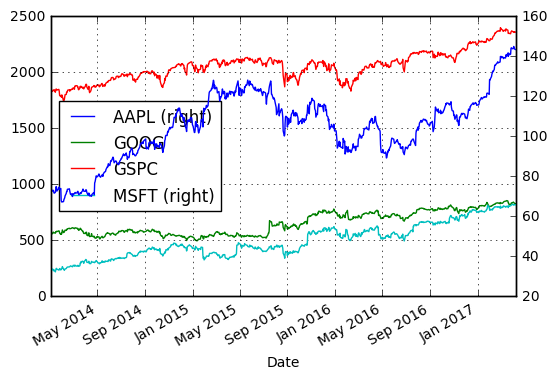

In [5]:
# Plotting stock prices from the start to end date.
%matplotlib inline
stocks.plot(secondary_y = ["AAPL", "MSFT"], grid = True)

In [6]:
# I'm defining a good stock as one that rose more than 15% in the last 1 year.
# This is to check that I'm not buying stocks that aren't doing well.
def oneyear(int,str):
    daysago = len(str) - int
    percentage = (str[daysago] - str[(daysago-250)])/str[(daysago-250)]
    if (percentage > 0.15): 
        return True
    else: 
        return False

In [7]:
# I'm defining "low" when a stock dropped at least 1% in the last week.
# This is to identify which dates to buy a certain stock based on the "buy low, sell high" strategy.
def oneweek(int,str):
    daysago = len(str) - int
    percentage = (str[daysago] - str[(daysago-5)])/str[(daysago-5)]
    if (percentage < -0.005): 
        return True
    else: 
        return False

In [8]:
# Keeping an index of the dates.
dates = apple.reset_index()['Date']

In [11]:
# Look forward 5 days from a selected date and return the highest percentage return of the 5 days.
import numpy as np
def oneweekforward(int,str):
    daysago = len(str) - int
    highest = np.amax(str[daysago:daysago+5])
    return (highest - str[daysago])/str[daysago]

In [12]:
# Returns a list of selected dates considered good dates to buy a certain stock.
# Calculates average highest percentage return over the next 5 days of those selected dates. 
def getdatesfor(int, str):
    highests_selected = []
    print "Selected dates and percentage:"
    for i in range(10,10+int):
        if (oneweek(i,str) and oneyear(i,str)):
            print dates[i]
            highests_selected.append(oneweekforward(i,google))
    if len(highests_selected) == 0:
        print "No dates selected."
    else:
        print "Highest percentage return for selected dates:",(sum(highests_selected)/len(highests_selected))*100, "%"
    highests_unselected = []
    print "\n"
    print "NOT selected dates and percentage:"
    for i in range(10,10+int):
        if not(oneweek(i,str) and oneyear(i,str)):
            print dates[i]
            highests_unselected.append(oneweekforward(i,google))
    if len(highests_unselected) == 0:
        print "No dates unselected."
    else:
        print "Highest percentage return for unselected dates:",(sum(highests_unselected)/len(highests_unselected))*100, "%"

In [13]:
getdatesfor(50,microsoft)

Selected dates and percentage:
2014-02-11 00:00:00
2014-02-12 00:00:00
2014-02-14 00:00:00
2014-02-18 00:00:00
2014-03-07 00:00:00
2014-03-10 00:00:00
2014-03-11 00:00:00
2014-03-12 00:00:00
2014-03-26 00:00:00
Highest percentage return for selected dates: 1.48707559126 %


NOT selected dates and percentage:
2014-01-16 00:00:00
2014-01-17 00:00:00
2014-01-21 00:00:00
2014-01-22 00:00:00
2014-01-23 00:00:00
2014-01-24 00:00:00
2014-01-27 00:00:00
2014-01-28 00:00:00
2014-01-29 00:00:00
2014-01-30 00:00:00
2014-01-31 00:00:00
2014-02-03 00:00:00
2014-02-04 00:00:00
2014-02-05 00:00:00
2014-02-06 00:00:00
2014-02-07 00:00:00
2014-02-10 00:00:00
2014-02-13 00:00:00
2014-02-19 00:00:00
2014-02-20 00:00:00
2014-02-21 00:00:00
2014-02-24 00:00:00
2014-02-25 00:00:00
2014-02-26 00:00:00
2014-02-27 00:00:00
2014-02-28 00:00:00
2014-03-03 00:00:00
2014-03-04 00:00:00
2014-03-05 00:00:00
2014-03-06 00:00:00
2014-03-13 00:00:00
2014-03-14 00:00:00
2014-03-17 00:00:00
2014-03-18 00:00:00
2014-03-19

In [14]:
getdatesfor(50,apple)

Selected dates and percentage:
2014-02-06 00:00:00
Highest percentage return for selected dates: 1.22700121639 %


NOT selected dates and percentage:
2014-01-16 00:00:00
2014-01-17 00:00:00
2014-01-21 00:00:00
2014-01-22 00:00:00
2014-01-23 00:00:00
2014-01-24 00:00:00
2014-01-27 00:00:00
2014-01-28 00:00:00
2014-01-29 00:00:00
2014-01-30 00:00:00
2014-01-31 00:00:00
2014-02-03 00:00:00
2014-02-04 00:00:00
2014-02-05 00:00:00
2014-02-07 00:00:00
2014-02-10 00:00:00
2014-02-11 00:00:00
2014-02-12 00:00:00
2014-02-13 00:00:00
2014-02-14 00:00:00
2014-02-18 00:00:00
2014-02-19 00:00:00
2014-02-20 00:00:00
2014-02-21 00:00:00
2014-02-24 00:00:00
2014-02-25 00:00:00
2014-02-26 00:00:00
2014-02-27 00:00:00
2014-02-28 00:00:00
2014-03-03 00:00:00
2014-03-04 00:00:00
2014-03-05 00:00:00
2014-03-06 00:00:00
2014-03-07 00:00:00
2014-03-10 00:00:00
2014-03-11 00:00:00
2014-03-12 00:00:00
2014-03-13 00:00:00
2014-03-14 00:00:00
2014-03-17 00:00:00
2014-03-18 00:00:00
2014-03-19 00:00:00
2014-03-20

In [15]:
getdatesfor(50,google)

Selected dates and percentage:
2014-03-11 00:00:00
2014-03-12 00:00:00
Highest percentage return for selected dates: 1.1201946215 %


NOT selected dates and percentage:
2014-01-16 00:00:00
2014-01-17 00:00:00
2014-01-21 00:00:00
2014-01-22 00:00:00
2014-01-23 00:00:00
2014-01-24 00:00:00
2014-01-27 00:00:00
2014-01-28 00:00:00
2014-01-29 00:00:00
2014-01-30 00:00:00
2014-01-31 00:00:00
2014-02-03 00:00:00
2014-02-04 00:00:00
2014-02-05 00:00:00
2014-02-06 00:00:00
2014-02-07 00:00:00
2014-02-10 00:00:00
2014-02-11 00:00:00
2014-02-12 00:00:00
2014-02-13 00:00:00
2014-02-14 00:00:00
2014-02-18 00:00:00
2014-02-19 00:00:00
2014-02-20 00:00:00
2014-02-21 00:00:00
2014-02-24 00:00:00
2014-02-25 00:00:00
2014-02-26 00:00:00
2014-02-27 00:00:00
2014-02-28 00:00:00
2014-03-03 00:00:00
2014-03-04 00:00:00
2014-03-05 00:00:00
2014-03-06 00:00:00
2014-03-07 00:00:00
2014-03-10 00:00:00
2014-03-13 00:00:00
2014-03-14 00:00:00
2014-03-17 00:00:00
2014-03-18 00:00:00
2014-03-19 00:00:00
2014-03-20 

In [16]:
getdatesfor(50, sp500)

Selected dates and percentage:
2014-01-22 00:00:00
2014-01-23 00:00:00
2014-01-24 00:00:00
2014-02-05 00:00:00
2014-02-06 00:00:00
2014-03-12 00:00:00
2014-03-13 00:00:00
2014-03-26 00:00:00
Highest percentage return for selected dates: 1.34506115314 %


NOT selected dates and percentage:
2014-01-16 00:00:00
2014-01-17 00:00:00
2014-01-21 00:00:00
2014-01-27 00:00:00
2014-01-28 00:00:00
2014-01-29 00:00:00
2014-01-30 00:00:00
2014-01-31 00:00:00
2014-02-03 00:00:00
2014-02-04 00:00:00
2014-02-07 00:00:00
2014-02-10 00:00:00
2014-02-11 00:00:00
2014-02-12 00:00:00
2014-02-13 00:00:00
2014-02-14 00:00:00
2014-02-18 00:00:00
2014-02-19 00:00:00
2014-02-20 00:00:00
2014-02-21 00:00:00
2014-02-24 00:00:00
2014-02-25 00:00:00
2014-02-26 00:00:00
2014-02-27 00:00:00
2014-02-28 00:00:00
2014-03-03 00:00:00
2014-03-04 00:00:00
2014-03-05 00:00:00
2014-03-06 00:00:00
2014-03-07 00:00:00
2014-03-10 00:00:00
2014-03-11 00:00:00
2014-03-14 00:00:00
2014-03-17 00:00:00
2014-03-18 00:00:00
2014-03-19